In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.patheffects as PathEffect
from matplotlib import offsetbox
import plotly.graph_objects as go
from time import time
import sys
import seaborn as sn
from tensorflow.keras.utils import to_categorical
import h5py
from keras.utils import to_categorical
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score

In [2]:
from keras.datasets import mnist 

In [3]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
trainy.shape


(60000,)

In [6]:
testX.shape


(10000, 28, 28)

In [7]:
testy.shape

(10000,)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


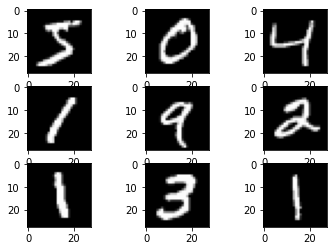

In [8]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
    plt.subplot(3,3, 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()


In [9]:
colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E', 'black']

In [10]:
trainX = trainX.reshape((trainX.shape[0],28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [11]:
trainX =trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)
trainX = trainX.astype('float32')
testX = testX.astype('float32')

In [12]:
trainX /= 255
testX /= 255

In [13]:
print("Train matrix shape", trainX.shape)
print("Test matrix shape", testX.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [14]:
data_slice = 10000
trainX = trainX[:data_slice,:]
testX = testX[:data_slice,:]


In [15]:
trainX.shape

(10000, 784)

In [16]:
trainy.shape

(60000,)

In [17]:
testX.shape

(10000, 784)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)
print(trainX.shape)
print(testX.shape)

(10000, 784)
(10000, 784)


In [19]:
t=time()
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=0)
train_pca = pca.fit_transform(trainX, trainy)
test_pca = pca.fit_transform(testX, testy)


In [20]:
print(pca.components_)

[[-6.4272154e-10 -6.6603439e-10 -2.7200228e-10 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 1.7522943e-08 -3.0037444e-09  3.3402110e-09 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [ 3.4777273e-08 -3.9781686e-08 -8.1160669e-09 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 ...
 [-3.6580175e-08 -1.1764134e-09  1.2400208e-08 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 1.5028878e-08  2.6155378e-08  2.2994795e-09 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [-2.8394782e-08  5.1305826e-09  7.9996800e-09 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]]


In [21]:
test_pca.shape, train_pca

((10000, 10),
 array([[-0.9977008 , -4.6517987 , -0.7404909 , ...,  0.63837934,
         -0.0772256 ,  0.6507544 ],
        [ 8.682748  , -7.1241536 , -4.1952763 , ...,  2.838317  ,
         -0.09026316, -2.0611718 ],
        [ 2.4390624 , 10.567126  , -4.056982  , ...,  6.713076  ,
         -1.4910334 , -0.51572096],
        ...,
        [-5.3075533 , -6.299622  ,  2.05315   , ...,  3.8307068 ,
         -4.3996673 , -3.9745622 ],
        [-5.43409   ,  3.7779155 , -2.1574442 , ..., -4.133158  ,
          2.5800989 ,  1.2605478 ],
        [-5.6869574 , -0.8001907 , -7.645772  , ...,  4.2083173 ,
          0.2680526 , -0.6222038 ]], dtype=float32))

In [22]:
print(pca.explained_variance_)

[41.398945 28.35111  27.019646 21.582472 18.405716 16.09456  13.663892
 12.5804   11.161534 10.136836]


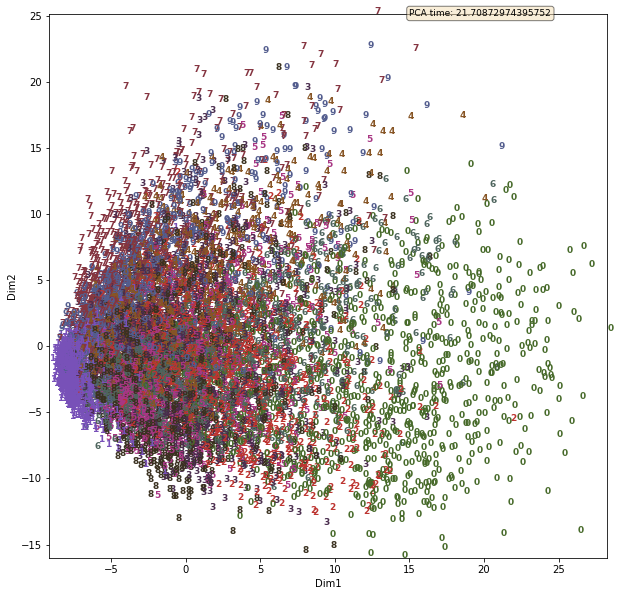

In [23]:
plt.figure(figsize=(10,10))
plt.xlim(train_pca[:,0].min(), train_pca[:,0].max())
plt.ylim(train_pca[:,1].min(), train_pca[:,1].max())
for i in range(len(trainX)):
    plt.text(train_pca[i,0], train_pca[i,1], str(trainy[i]),
             color = colors[trainy[i]],
            fontdict={'weight':'bold', 'size':9})
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.text(15, 25, str("PCA time: {}".format(time()-t)),
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=9)
plt.show()

In [24]:
from sklearn.manifold import TSNE
data_1000 = trainX[0:10000,:]
labels_1000 = testX[0:10000]

In [25]:
data_1000.shape, labels_1000.shape

((10000, 784), (10000, 784))

In [26]:
tsne = TSNE(n_components=2, random_state=0 )
train_tsne = tsne.fit_transform(data_1000, trainy)
test_tsne = tsne.fit_transform(labels_1000, testy)

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(train_tsne[:,0].min(), train_tsne[:,0].max())
plt.ylim(train_tsne[:,1].min(), train_tsne[:,1].max())
for i in range(len(trainX)):
    plt.text(train_tsne[i,0], train_tsne[i,1], str(trainy[i]),
             color = colors[trainy[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.text(15, 25, str("TSNE time: {}".format(time()-t)),
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=9)
plt.show()

In [ ]:
t=time()
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=10, min_samples=6)
db = db.fit(train_pca)
clusters_db = db.fit_predict(test_pca)
labels_db = db.labels_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(train_pca, labels))
print ("number of clusters in pca-DBSCAN: ", n_clusters_)

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(testy)):
    plt.text(test_pca[i,0], test_pca[i,1], str(testy[i]),
             color = colors[testy[i]],
            fontdict={'weight':'bold', 'size':9})
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.text(15, 25, str("DBSCAN time: {}".format(time()-t)),
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=9)
plt.show()

print ("DBSCAN time: ", time()-t)

In [ ]:
t = time()
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=10, random_state=0)
km = km.fit(train_pca)
labels_km = km.labels_
clusters_km = km.predict(test_pca)

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(testy)):
    plt.text(test_pca[i,0], test_pca[i,1], str(testy[i]),
             color = colors[clusters_km[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA -> k-MEANS')
plt.xlabel("Dim1")
plt.ylabel("Dim2")
plt.text(15, 25, str("k-MEANS time: {}".format(time()-t)),
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=9)
plt.show()

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
print ("ARI of DBSCAN testing set: {:.2f}".format(adjusted_rand_score(testy, clusters_db)))


In [ ]:
print ("ARI of Kmeans testing set: {:.2f}".format(adjusted_rand_score(testy, clusters_km)))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(trainX, trainy)
score = gnb.score(testX, testy)
print ("Score :", score)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print ("Accuracy Score of DBSCAN testing set: {:.2f}".format(accuracy_score(testy, clusters_db)))
print ("Accuracy Score of Kmeans testing set: {:.2f}".format(accuracy_score(testy, clusters_km)))

Training MNIST for Neural network

In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold

In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", trainy.shape)
trainy = np_utils.to_categorical(trainy, n_classes)
testy = np_utils.to_categorical(testy, n_classes)
print("Shape after one-hot encoding: ", trainy.shape)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.save_weights('FC.h5')

In [ ]:
scores, histories = list(), list()
kfold = KFold(n_splits = 5, shuffle=True, random_state=1)

In [ ]:
for train_ix, test_ix in kfold.split(trainX):
    history = model.fit(trainX, trainy, batch_size=128, epochs=12, verbose=2, validation_data=(testX, testy))
    _, acc = model.evaluate(testX, testy, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
return scores, histories

In [ ]:
# plot diagnostic learning curves
for i in range(len(histories)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
# print summary
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
# box and whisker plots of results
plt.boxplot(scores)
plt.show()